In [102]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


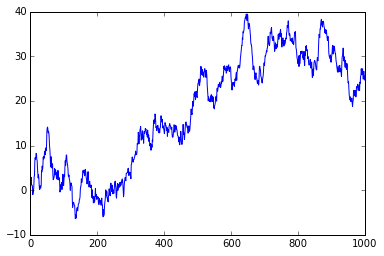

In [103]:
plt.plot(np.random.randn(1000).cumsum())

In [104]:
import pandas as pd
from pandas import Series,DataFrame

In [105]:
np.arange(10)[:5]

array([0, 1, 2, 3, 4])

In [106]:
index = ['a','b','c','d','e']
s = Series(np.arange(5),index = index)

In [107]:
print s.values

[0 1 2 3 4]


In [108]:
s[:3]

a    0
b    1
c    2
dtype: int64

In [109]:
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [110]:
s[[4,0,2]]

e    4
a    0
c    2
dtype: int64

In [111]:
dates = pd.date_range('2012-07-16','2012-07-21')
atemps = Series([101.5,100,98,95,92,90],index = dates)
atemps

2012-07-16    101.5
2012-07-17    100.0
2012-07-18     98.0
2012-07-19     95.0
2012-07-20     92.0
2012-07-21     90.0
Freq: D, dtype: float64

In [112]:
atemps.index[2]

Timestamp('2012-07-18 00:00:00', offset='D')

In [113]:
sdtemps = Series([74,72,60,62,52,58],index = dates)
temps = DataFrame({"Austing":atemps,"San Diego":sdtemps})

In [114]:
temps.columns

Index([u'Austing', u'San Diego'], dtype='object')

In [115]:
temps['diff'] = temps['San Diego'] - temps['Austing']

In [116]:
print temps

            Austing  San Diego  diff
2012-07-16    101.5         74 -27.5
2012-07-17    100.0         72 -28.0
2012-07-18     98.0         60 -38.0
2012-07-19     95.0         62 -33.0
2012-07-20     92.0         52 -40.0
2012-07-21     90.0         58 -32.0


In [117]:
# data from this time frame onwards
idx = temps.index[2]
sub_data = temps.ix[idx:,["Austing","San Diego","diff"]]

In [118]:
print sub_data

            Austing  San Diego  diff
2012-07-18       98         60   -38
2012-07-19       95         62   -33
2012-07-20       92         52   -40
2012-07-21       90         58   -32


In [119]:
#column means
temps.mean(0)

Austing      96.083333
San Diego    63.000000
diff        -33.083333
dtype: float64

In [120]:
temps-temps.mean()
print temps

            Austing  San Diego  diff
2012-07-16    101.5         74 -27.5
2012-07-17    100.0         72 -28.0
2012-07-18     98.0         60 -38.0
2012-07-19     95.0         62 -33.0
2012-07-20     92.0         52 -40.0
2012-07-21     90.0         58 -32.0


In [121]:
temps[temps.Austing > 97]

,Austing,San Diego,diff
2012-07-16,101.5,74,-27.5
2012-07-17,100.0,72,-28.0
2012-07-18,98.0,60,-38.0


In [181]:
data = pd.read_csv('id_time_vitals_train.csv')

In [182]:
data.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            628427, 628428, 628429, 628430, 628431, 628432, 628433, 628434,
            628435, 628436],
           dtype='int64', length=628437)

In [183]:
data.head(4)

,ID,TIME,V1,V2,V3,V4,V5,V6,ICU
0,1,0,86,49,70,NaN,87,NaN,0
1,1,4320,NaN,NaN,70,NaN,NaN,NaN,0
2,1,5646,91,58,NaN,NaN,NaN,96.6,1
3,1,5703,140,73,91,32,NaN,NaN,1


In [184]:
data_time = data.index

In [185]:
data.shape

(628437, 9)

In [186]:
data2 = data.take(np.random.permutation(len(data)))

In [187]:
data2.head(3)

,ID,TIME,V1,V2,V3,V4,V5,V6,ICU
431405,2401,2392288,122,73,91,39,88,NaN,1
415076,2327,535976,112,74,86,19,NaN,99.1,0
489691,2678,704147,NaN,NaN,73,24,100,NaN,1


In [188]:
data.head()

,ID,TIME,V1,V2,V3,V4,V5,V6,ICU
0,1,0,86,49,70,NaN,87,NaN,0
1,1,4320,NaN,NaN,70,NaN,NaN,NaN,0
2,1,5646,91,58,NaN,NaN,NaN,96.6,1
3,1,5703,140,73,91,32,NaN,NaN,1
4,1,6342,139,90,107,29,101,NaN,1


In [189]:
data3 = data.sort_index()

In [190]:
data3.head(3)

,ID,TIME,V1,V2,V3,V4,V5,V6,ICU
0,1,0,86,49,70,NaN,87,NaN,0
1,1,4320,NaN,NaN,70,NaN,NaN,NaN,0
2,1,5646,91,58,NaN,NaN,NaN,96.6,1


In [205]:
data.head(3)
rng = data['TIME']
data.shape


(628437, 9)

In [210]:
data.head(3)

,ID,TIME,V1,V2,V3,V4,V5,V6,ICU
0,1,0,86,49,70,NaN,87,NaN,0
1,1,4320,NaN,NaN,70,NaN,NaN,NaN,0
2,1,5646,91,58,NaN,NaN,NaN,96.6,1


In [211]:
rng.head(3)

0       0
1    4320
2    5646
Name: TIME, dtype: int64

In [212]:
data2 = data[['TIME','V1']]

In [213]:
data2.head(2)

,TIME,V1
0,0,86
1,4320,NaN


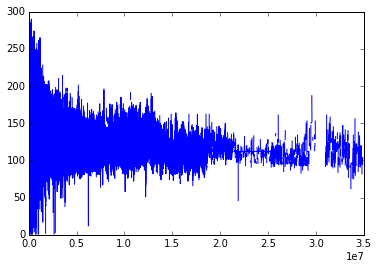

In [215]:
plt.plot(data2['TIME'],data2['V1'])

In [216]:
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2015-10-16 18:39:20--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 307 Proxy Redirect
Location: https://ironport2.iitk.ac.in/B0001D0000N0000F0000S0000R0004/http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii [following]
--2015-10-16 18:39:23--  https://ironport2.iitk.ac.in/B0001D0000N0000F0000S0000R0004/http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving ironport2.iitk.ac.in (ironport2.iitk.ac.in)... 172.22.1.2
Connecting to ironport2.iitk.ac.in (ironport2.iitk.ac.in)|172.22.1.2|:443... connected.
ERROR: The certificate of `ironport2.iitk.ac.in' is not trusted.
ERROR: The certificate of `ironport2.iitk.ac.in' hasn't g

In [233]:
dude = list(pd.date_range('11-01-2015',periods=5, freq='D'))

In [234]:
dude

[Timestamp('2015-11-01 00:00:00', offset='D'),
 Timestamp('2015-11-02 00:00:00', offset='D'),
 Timestamp('2015-11-03 00:00:00', offset='D'),
 Timestamp('2015-11-04 00:00:00', offset='D'),
 Timestamp('2015-11-05 00:00:00', offset='D')]

In [219]:
print dude

DatetimeIndex(['2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15'],
              dtype='datetime64[ns]', freq='D', tz=None)


In [237]:
temps.head(3)

,Austing,San Diego,diff
2012-07-16,101.5,74,-27.5
2012-07-17,100.0,72,-28.0
2012-07-18,98.0,60,-38.0


In [253]:
sdtemps = temps['San Diego'].drop(temps.index[3])
print sdtemps

2012-07-16    74
2012-07-17    72
2012-07-18    60
2012-07-20    52
2012-07-21    58
Name: San Diego, dtype: int64


In [254]:
print temps

            Austing  San Diego  diff
2012-07-16    101.5         74 -27.5
2012-07-17    100.0         72 -28.0
2012-07-18     98.0         60 -38.0
2012-07-19     95.0         62 -33.0
2012-07-20     92.0         52 -40.0
2012-07-21     90.0         58 -32.0


In [255]:
diff = atemps - sdtemps

In [256]:
print diff

2012-07-16    27.5
2012-07-17    28.0
2012-07-18    38.0
2012-07-19     NaN
2012-07-20    40.0
2012-07-21    32.0
dtype: float64


In [257]:
diff.fillna(0)

2012-07-16    27.5
2012-07-17    28.0
2012-07-18    38.0
2012-07-19     0.0
2012-07-20    40.0
2012-07-21    32.0
dtype: float64

In [246]:
print temps - temps[:-1]

            Austing  San Diego  diff
2012-07-16        0          0     0
2012-07-17        0          0     0
2012-07-18        0          0     0
2012-07-19        0          0     0
2012-07-20        0          0     0
2012-07-21      NaN        NaN   NaN


In [252]:
diff = temps - sdtemps
print diff

            Austing  San Diego   diff
2012-07-16     27.5          0 -101.5
2012-07-17     28.0          0 -100.0
2012-07-18     38.0          0  -98.0
2012-07-19      NaN        NaN    NaN
2012-07-20     40.0          0  -92.0
2012-07-21     32.0          0  -90.0
